<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Electromagnetics/owlmPy_twobytwo_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/mojv/owlmPy

In [0]:
!pip install owlmPy

In [0]:
import numpy as np
import owlmPy as ow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Layers arrangement

In [0]:
ds = np.array([0,134,134,134,0])
index = np.array([1,2.53,1.5,1.38,1])

## Variation of Lambda

Text(0, 0.5, 'Index')

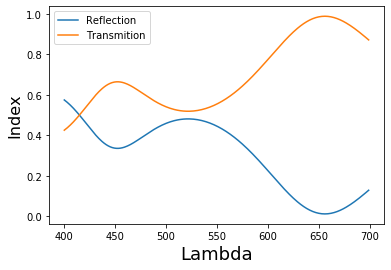

In [0]:
theta = 45 #incident wave (in degrees)
lambdas=np.arange(400,700,1) # wave lenght (in nm)

R=np.zeros((lambdas.shape[0]))
T=np.zeros((lambdas.shape[0]))
for i in range(lambdas.shape[0]):
    data = ow.twobytwo(index,ds,theta,lambdas[i], "s")
    R[i]=data['R']
    T[i]=data['T']
    
plt.plot(lambdas,R,label="Reflection")
plt.plot(lambdas,T,label="Transmition")
plt.legend()
plt.xlabel('Lambda', fontsize=18)
plt.ylabel('Index', fontsize=16)

## Variation of theta

/usr/local/lib/python3.6/dist-packages/owlmPy/twobytwoMatrix.py:161: RuntimeWarning: divide by zero encountered in true_divide
  t_tot = 1 / A[:, 0, 0]
/usr/local/lib/python3.6/dist-packages/owlmPy/twobytwoMatrix.py:161: RuntimeWarning: invalid value encountered in true_divide
  t_tot = 1 / A[:, 0, 0]
/usr/local/lib/python3.6/dist-packages/owlmPy/twobytwoMatrix.py:162: RuntimeWarning: invalid value encountered in true_divide
  r_tot = A[:, 1, 0] / A[:, 0, 0]


Text(0, 0.5, 'Index')

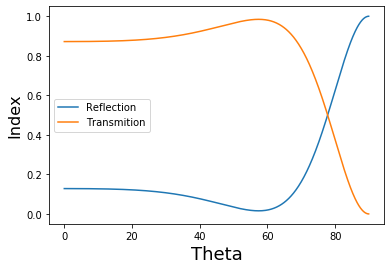

In [0]:
step=0.1;
theta_ini=np.arange(0,90,step)
lambd=633
data = ow.twobytwo_thetas(index,ds,theta_ini,lambd, "s")
R=data['R']
T=data['T']
plt.plot(theta_ini,R,label="Reflection")
plt.plot(theta_ini,T,label="Transmition")
plt.legend()
plt.xlabel('Theta', fontsize=18)
plt.ylabel('Index', fontsize=16)

## Variation of both Lambda & Theta

In [0]:
R=np.zeros((lambdas.shape[0],theta_ini.shape[0]))
T=np.zeros((lambdas.shape[0],theta_ini.shape[0]))
for i in range(lambdas.shape[0]):
    data = ow.twobytwo_thetas(index,ds,theta_ini,lambdas[i], "s")
    R[i]=data['R']
    T[i]=data['T']

/usr/local/lib/python3.6/dist-packages/owlmPy/twobytwoMatrix.py:161: RuntimeWarning: divide by zero encountered in true_divide
  t_tot = 1 / A[:, 0, 0]
/usr/local/lib/python3.6/dist-packages/owlmPy/twobytwoMatrix.py:161: RuntimeWarning: invalid value encountered in true_divide
  t_tot = 1 / A[:, 0, 0]
/usr/local/lib/python3.6/dist-packages/owlmPy/twobytwoMatrix.py:162: RuntimeWarning: invalid value encountered in true_divide
  r_tot = A[:, 1, 0] / A[:, 0, 0]


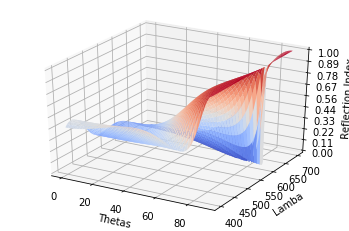

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = theta_ini
Y = lambdas
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('Thetas')
ax.set_ylabel('Lamba')
ax.set_zlabel('Reflection Index')

plt.show()